In [1]:
## Initial setup
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

import os
from dotenv import load_dotenv

load_dotenv()
API_TOKEN = os.getenv("API_TOKEN")
service = QiskitRuntimeService(channel="ibm_quantum", token=API_TOKEN)
backend = service.backend(name="ibm_rensselaer")

### Testing Const/Balance for 1-bit Functions

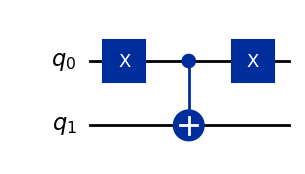

In [2]:
# f_bal(x) = NOT(x)
Uf_bal = qiskit.QuantumCircuit(2)
Uf_bal.x(0)
Uf_bal.cx(0, 1)
Uf_bal.x(0)
Uf_bal_gate = Uf_bal.to_gate()
Uf_bal.draw(output='mpl')

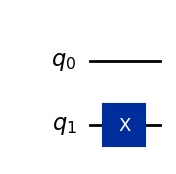

In [3]:
# f_const(x) = 1
Uf_const = qiskit.QuantumCircuit(2)
Uf_const.x(1)
Uf_const_gate = Uf_const.to_gate()
Uf_const.draw(output='mpl')

In [6]:
def check_balance_circuit(Uf):
    # 2 qubits and 1 classical bit to measure the top qubit at the end
    qc = qiskit.QuantumCircuit(2, 1)
    qc.initialize("00")
    # initial state (entagle)
    qc.h(0)
    qc.x(1)
    qc.h(1)
    # run the Uf
    qc.append(Uf, [0, 1])
    # detangle and measure
    qc.h([0, 1])
    qc.measure([0], [0])
    return qc

def check_balance_results(Uf):
    qc = check_balance_circuit(Uf)
    qc = qiskit.transpile(qc, backend)
    sampler = Sampler(backend)
    job = sampler.run([qc], shots=10**4)
    result = job.result()[0]
    counts = result.data.c.get_counts()
    return counts

In [7]:
counts_bal = check_balance_results(Uf_bal_gate)
counts_const = check_balance_results(Uf_const_gate)

In [8]:
print(counts_bal)
print(counts_const)

{'1': 9866, '0': 134}
{'0': 9956, '1': 44}
